# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, wer're going to simplify it: predicting a numberical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


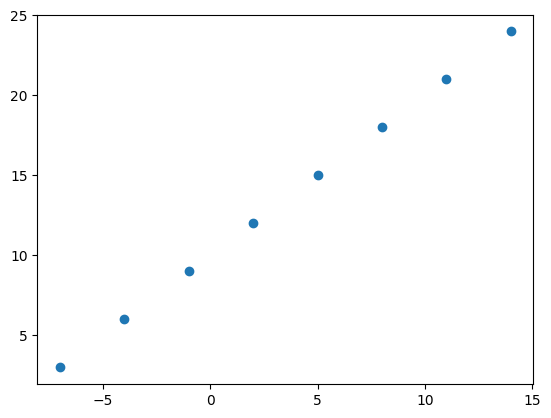

In [ ]:
# Creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)
#

## Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
ourput_shape = y[0].shape
input_shape, ourput_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. Creating a model
    * define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model
    * define the loss function (in orther words, the function which tells our model how wrong it is)
    * the oprimizer (tells our model how to improve the patterns its learning)
    * evaluation metrics (what we can use to interpret the performance of our model)
3. Fitting a model
    * letting the model try to find patterns between X & y (features and labels)

In [ ]:
# Set reandom seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # input 1 number and predicts 1 number (7 -> -3)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mae is short for mean absolate error
    optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
    metrics=['mae']
)

# 3. Fit the model
# model.fit(X, y, epochs=5)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step - loss: 20.0805 - mae: 20.0805
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 19.7992 - mae: 19.7992
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 19.5180 - mae: 19.5180
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 19.2367 - mae: 19.2367
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 18.9555 - mae: 18.9555


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a predictin using our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[-19.23677]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model**
    * we might add more layers
    * increase the number of hidden units (all called neurons) within each of the hidden layers
    * change the activation function of each layer.
2. **Compiling a model**
    * we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model**
    * we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step - loss: 18.2688 - mae: 18.2688
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 17.9875 - mae: 17.9875
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 17.7063 - mae: 17.7063
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 17.4250 - mae: 17.4250
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 17.1438 - mae: 17.1438
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 16.8625 - mae: 16.8625
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 16.5813 - mae: 16.5813
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 16.3000 - mae: 16.3000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 16.0188 - mae: 16.0188
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 15.7375 - mae: 15.7375
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 15.4563 - mae: 15.4563
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 15.1750 - mae: 15.1750
Epoch 13/100
1/1 ━━━━━━

In [ ]:
# Try and make a predictin using our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[29.734734]], dtype=float32)

In [ ]:
# Let's rebuild our model

# 1. Create the model
# this time we'll add more hidden layer with a 100 units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step - loss: 12.6985 - mae: 12.6985
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 12.0964 - mae: 12.0964
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 11.4887 - mae: 11.4887
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 10.8590 - mae: 10.8590
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.2036 - mae: 10.2036
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.5180 - mae: 9.5180
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.7964 - mae: 8.7964
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 8.0305 - mae: 8.0305
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 7.2136 - mae: 7.2136
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 6.3382 - mae: 6.3382
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.3954 - mae: 5.3954
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.5805 - mae: 4.5805
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Try and make a predictin using our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[32.42084]], dtype=float32)

In [ ]:
# Let's rebuild our model

# 1. Create the model
# this time we'll add more hidden layer with a 100 units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.4010 - mae: 14.4010
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 13.6240 - mae: 13.6240
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 12.8729 - mae: 12.8729
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 12.2157 - mae: 12.2157
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 11.7168 - mae: 11.7168
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 11.2146 - mae: 11.2146
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 10.7054 - mae: 10.7054
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 10.1927 - mae: 10.1927
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 9.6728 - mae: 9.6728
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 9.1361 - mae: 9.1361
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 8.5811 - mae: 8.5811
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 8.0084 - mae: 8.0084
Epoch 13/100
1/1 ━━━━━━━━━━

In [ ]:
# Try and make a predictin using our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[27.182426]], dtype=float32)

## Evaluting a model

In practice, a typical workflow you'll go through wehn building neural network is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> ...
```

When it comse to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visuallize:
* The data - what data are we working with ? what does it look like ?
* The model itself  what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels) ?

In [ ]:
# Make a bigger dataset
import tensorflow as tf
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

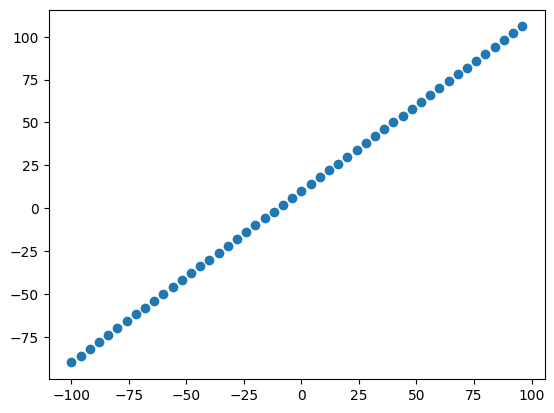

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total dta you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what si has learned, this set is typically 10-15% of the total data available.

<img src="https://raw.githubusercontent.com/MahdadGhasemian/ai-lab/main/tensorflow-deep-learning/images/tree-datasets.png" />


In [ ]:
# Check the length of host many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)



(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

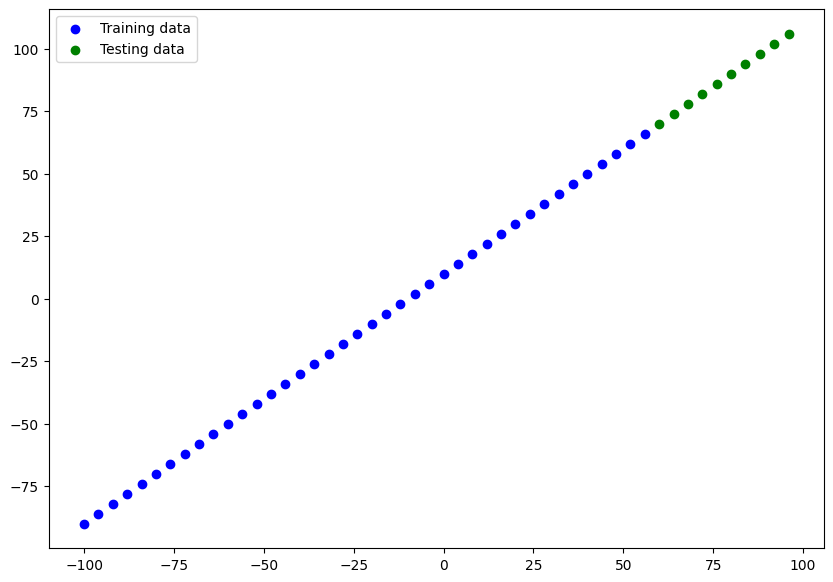

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"]
)

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 362ms/step - loss: 83.5812 - mae: 83.5812
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 76.6395 - mae: 76.6395
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 69.8535 - mae: 69.8535
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 63.2139 - mae: 63.2139
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 56.7165 - mae: 56.7165
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 50.3779 - mae: 50.3779
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 44.1932 - mae: 44.1932
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 38.0957 - mae: 38.0957
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 32.1037 - mae: 32.1037
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 26.1937 - mae: 26.1937
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 20.4668 - mae: 20.4668
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 14.8806 - mae: 14.8806
Epoch 13/100
2/2 ━━━━━━━

In [ ]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

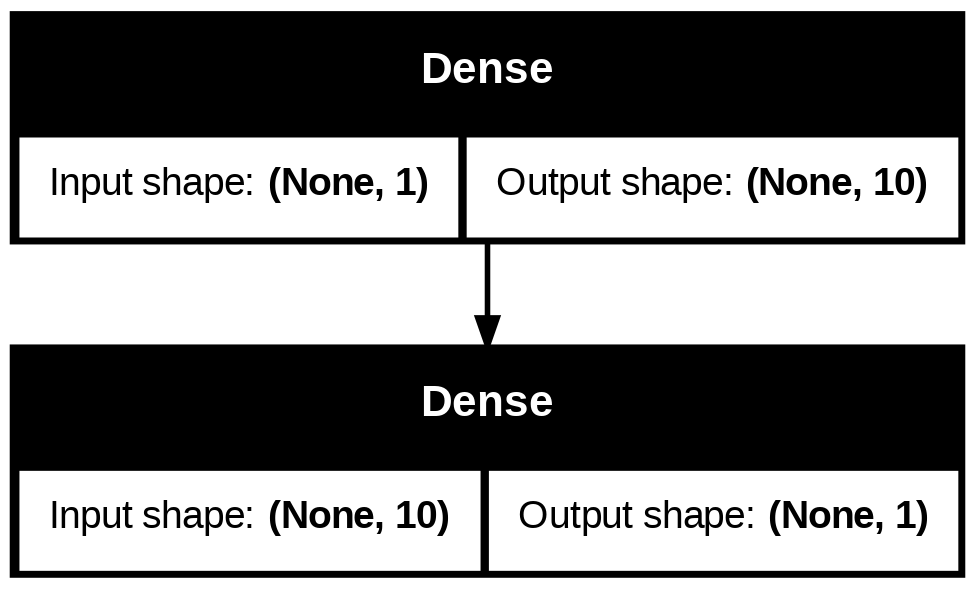

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


### Visualizing our module's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in form of `y_test` or `y_true` versus `y_pred` (groudn truth versus your model's predictions).

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the futuer, it's a good idea to trun it into a function

In [3]:
# Let's creae a plotting function
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions):
  """
  Plots training dta, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


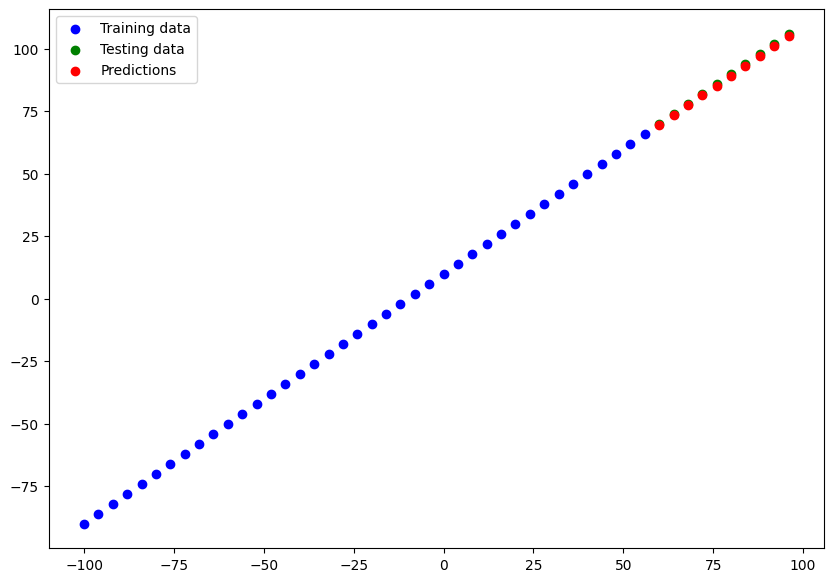

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there with be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's perdictions"
* MSE - mean square error, "square the average errors"

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - loss: 0.7178 - mae: 0.7178


[0.717791736125946, 0.717791736125946]

In [2]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  mae = tf.keras.metrics.MeanAbsoluteError()
  mae.update_state(tf.constant(y_true), tf.constant(y_pred))
  return mae.result().numpy()

def mse(y_true, y_pred):
  mse = tf.keras.metrics.MeanSquaredError()
  mse.update_state(tf.constant(y_true), tf.constant(y_pred))
  return mse.result().numpy()

In [ ]:
# Calculate the mean absolute error
mae(y_true=y_test, y_pred=y_pred)

np.float32(0.71779174)

In [ ]:
# Calculate the mean squre error
mse(y_true=y_test, y_pred=y_pred)

np.float32(0.5322998)

## Running experiments to improve our model

> Build a model -> fit it -> evaluate it -> tweak it -> evaluate it -> tweak it -> fit it -> evaluate it -> ...

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationsships between features and labels).
2. Make your model larger (using a more complex model) - this might come it the from of more layers or more hidden unints in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 200 epochs

In [1]:
# Make the dataset again
import tensorflow as tf
import matplotlib.pyplot as plt

X = tf.range(-100, 100, 4)

# Make labels for the dataset
y = X + 10

# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

X, y, len(X_train), len(X_test), len(y_train), len(y_test)

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 40,
 10,
 40,
 10)

**Build `model_1`**
* 1 layer, trained for 100 epochs.

In [5]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
)

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


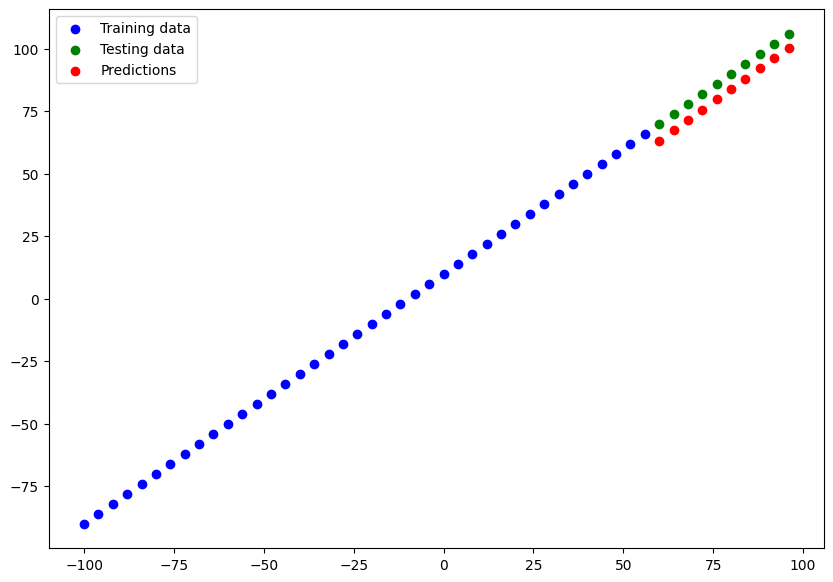

In [6]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_1)

In [7]:
# Calculate model_1 evaluation metrcis
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(np.float32(6.1703844), np.float32(38.199554))

**Build `model_2`**
* 2 layers, trained for 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
)

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


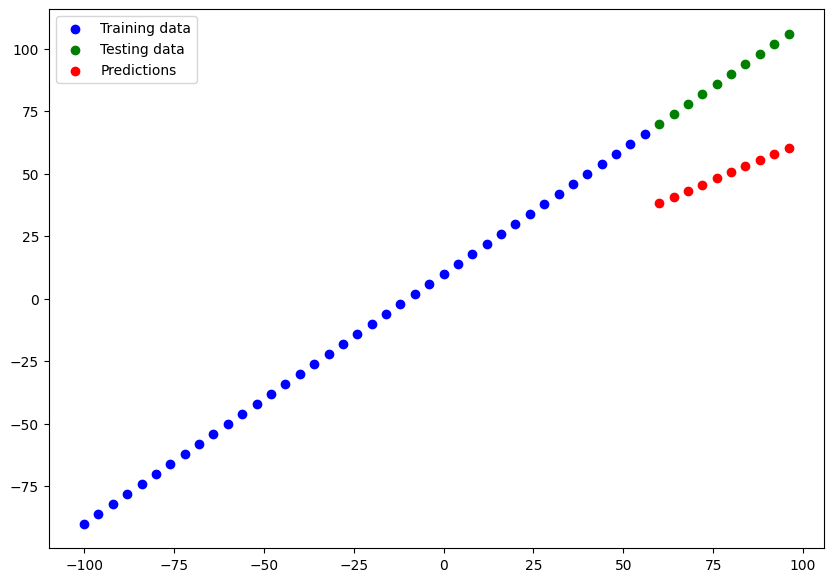

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrcis
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(np.float32(38.629616), np.float32(1512.0834))

**Build `model_3`**
* 2 layers, trained for 200 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
)

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


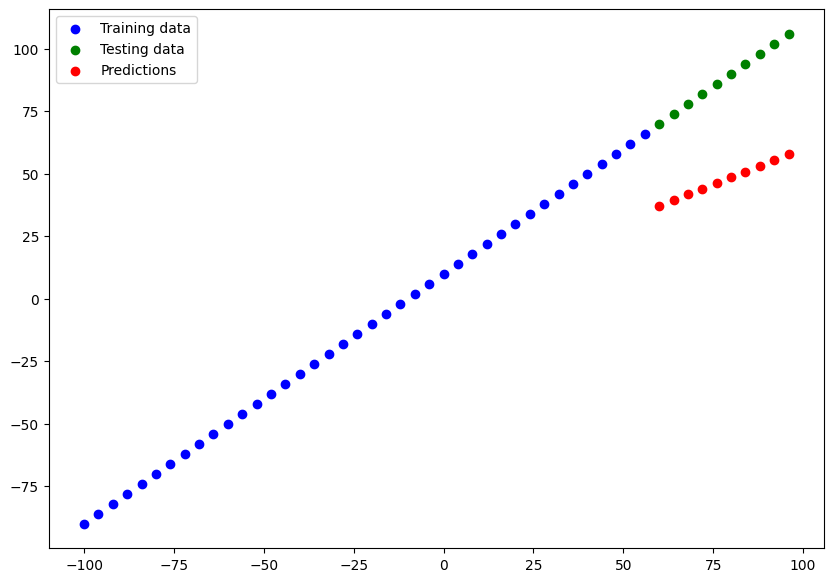

In [ ]:
# Make and plot predictions for model_2
y_preds_3 = model_3.predict(X_test)
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrcis
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(np.float32(40.536476), np.float32(1667.4802))

### Comparing the results of our exprements

We've run a few experiments, let's compare the results

In [ ]:
# Let's compoare our model's results using a pandas DataFrame
import pandas as pd

model_results = [
    ["model_1", mae_1, mse_1],
    ["model_2", mae_2, mse_2],
    ["model_3", mae_3, mse_3],
]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,2.335756,7.821094
1,model_2,38.629616,1512.083374
2,model_3,40.536476,1667.480225


## Tracking you experiments

> One really good habit in machine learning modelling is to track the results of your expriments.

And when doing so, it can be tedious if you're running lots of experiments.

> Luckily, there are tools to help us

📖 **Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our models

> Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web appliction or mobile app

There are two main formats we can save our model's too:
1. The SavedModel format
2. The HDF5 format

In [9]:
# Save model using the SavedModel format
model_1.save("model_1.keras")

In [10]:
# Save model using the HDF5 format
model_1.save("model_1.h5")

## Loading in a saved model

In [11]:
# Load in the saved model format model
loaded_model_1 = tf.keras.models.load_model("model_1.keras")
loaded_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


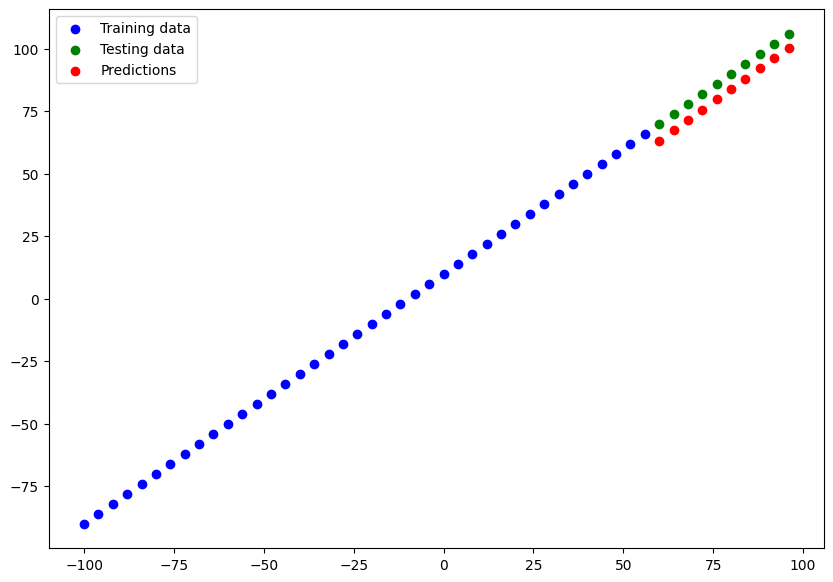

In [12]:
# Make and plot predictions for loaded_model_1
y_preds_loaded_model_1 = loaded_model_1.predict(X_test)
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_loaded_model_1)

In [13]:
# Compare model_1 predictions with loaded_model_1 predictions
y_preds_loaded_model_1 == y_preds_1

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [14]:
# Load in a model using the .h5 format
loaded_model_1_h5 = tf.keras.models.load_model("model_1.h5")
loaded_model_1_h5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


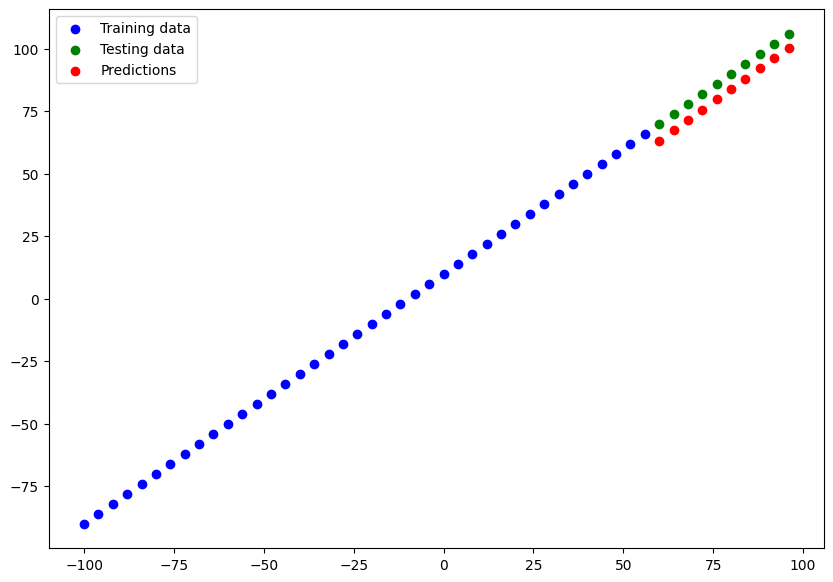

In [15]:
# Make and plot predictions for loaded_model_1_h5
y_preds_loaded_model_1_h5 = loaded_model_1_h5.predict(X_test)
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_loaded_model_1_h5)

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:
1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below)
3. Save it to Google Drive by connection Google Drive and copying it there

In [21]:
# Download a file from Google Colab
from google.colab import files
files.download("model_1.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## A larger Example

In [31]:
# Import required library
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [23]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
# Let's try on-how encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [26]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [30]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [28]:
# View y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [32]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [34]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 10114.3955 - mae: 10114.3955
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7573.6694 - mae: 7573.6694
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7554.7666 - mae: 7554.7666
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7992.8276 - mae: 7992.8276
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7876.1851 - mae: 7876.1851
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7803.1865 - mae: 7803.1865
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7107.5796 - mae: 7107.5796
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7380.6699 - mae: 7380.6699
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7341.9180 - mae: 7341.9180
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7599.1201 - mae: 7599.1201
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7373.6968 - mae: 7373.6968
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [35]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6164.5298 - mae: 6164.5298


[5958.7880859375, 5958.7880859375]

Right now it looks like our model isn't performing too well... let's try and improve it

In [44]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
history = insurance_model_2.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 13276.2490 - mae: 13276.2490
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13150.0059 - mae: 13150.0059
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12875.8760 - mae: 12875.8760
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12316.0029 - mae: 12316.0029
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11323.1328 - mae: 11323.1328
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9929.1094 - mae: 9929.1094  
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8493.8760 - mae: 8493.8760
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7591.4785 - mae: 7591.4785
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7404.3701 - mae: 7404.3701
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7372.4116 - mae: 7372.4116
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7351.1841 - mae: 7351.1841
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━

In [43]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3467.8264 - mae: 3467.8264


[3400.975830078125, 3400.975830078125]

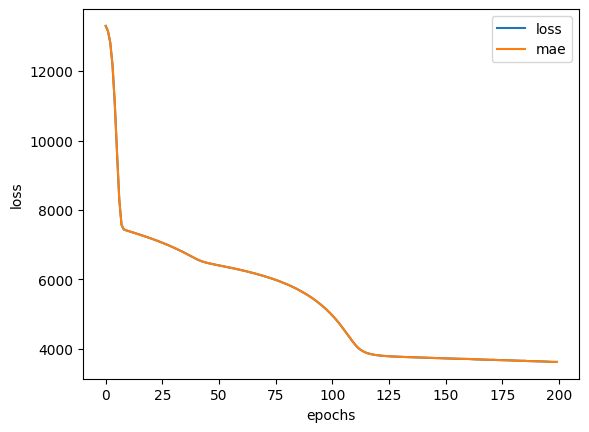

In [45]:
# Plot hisotry (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which perfomrs better.

<img src="https://raw.githubusercontent.com/MahdadGhasemian/ai-lab/main/tensorflow-deep-learning/images/feature-scaling-normalisation.png" />


<Axes: ylabel='Frequency'>

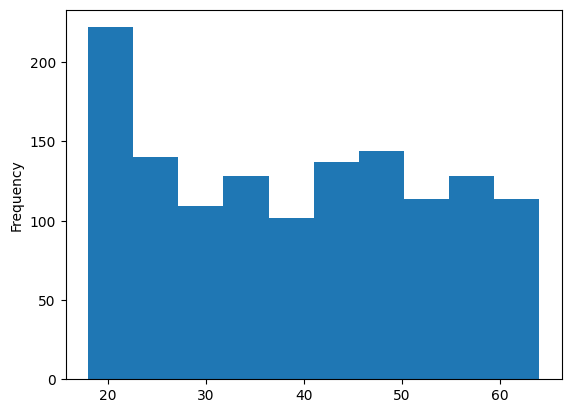

In [49]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

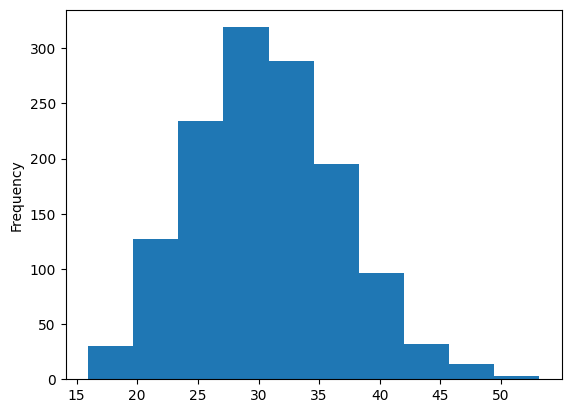

In [50]:
X["bmi"].plot(kind="hist")

In [51]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [54]:
# Import required library
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [55]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [61]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these colums between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaller) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [62]:
# What does our data look like now ?
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [63]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [64]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one how encoded. Now let's build a neural network model on it and see how it goes.

In [65]:
# Build a neural network model to fit on our normalized data

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
history = insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 13297.9570 - mae: 13297.9570
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13289.9346 - mae: 13289.9346
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13270.0156 - mae: 13270.0156
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13226.2363 - mae: 13226.2363
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13145.5781 - mae: 13145.5781
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13015.9385 - mae: 13015.9385
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12827.2021 - mae: 12827.2021
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12569.8203 - mae: 12569.8203
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12234.4551 - mae: 12234.4551
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11817.2891 - mae: 11817.2891
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11332.5303 - mae: 11332.5303
Epoch 12/200
34/34 ━━━━━━━━━━

In [67]:
# Evaluate our insurance model trained on normalized data
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3213.2983 - mae: 3213.2983


[3161.05419921875, 3161.05419921875]

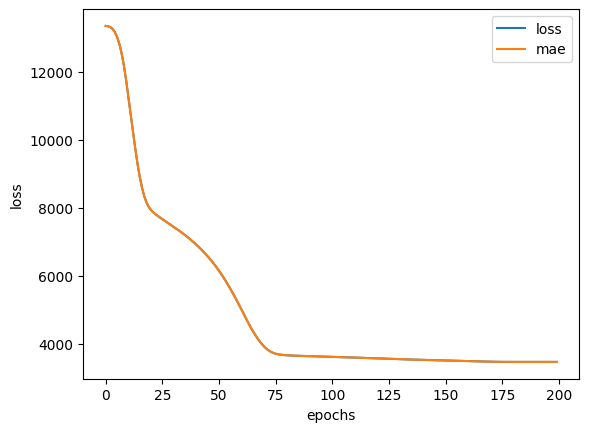

In [68]:
# Plot hisotry
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");